In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("white")
df = pd.read_csv("../Data/Advertising.csv", index_col=0)

df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [29]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


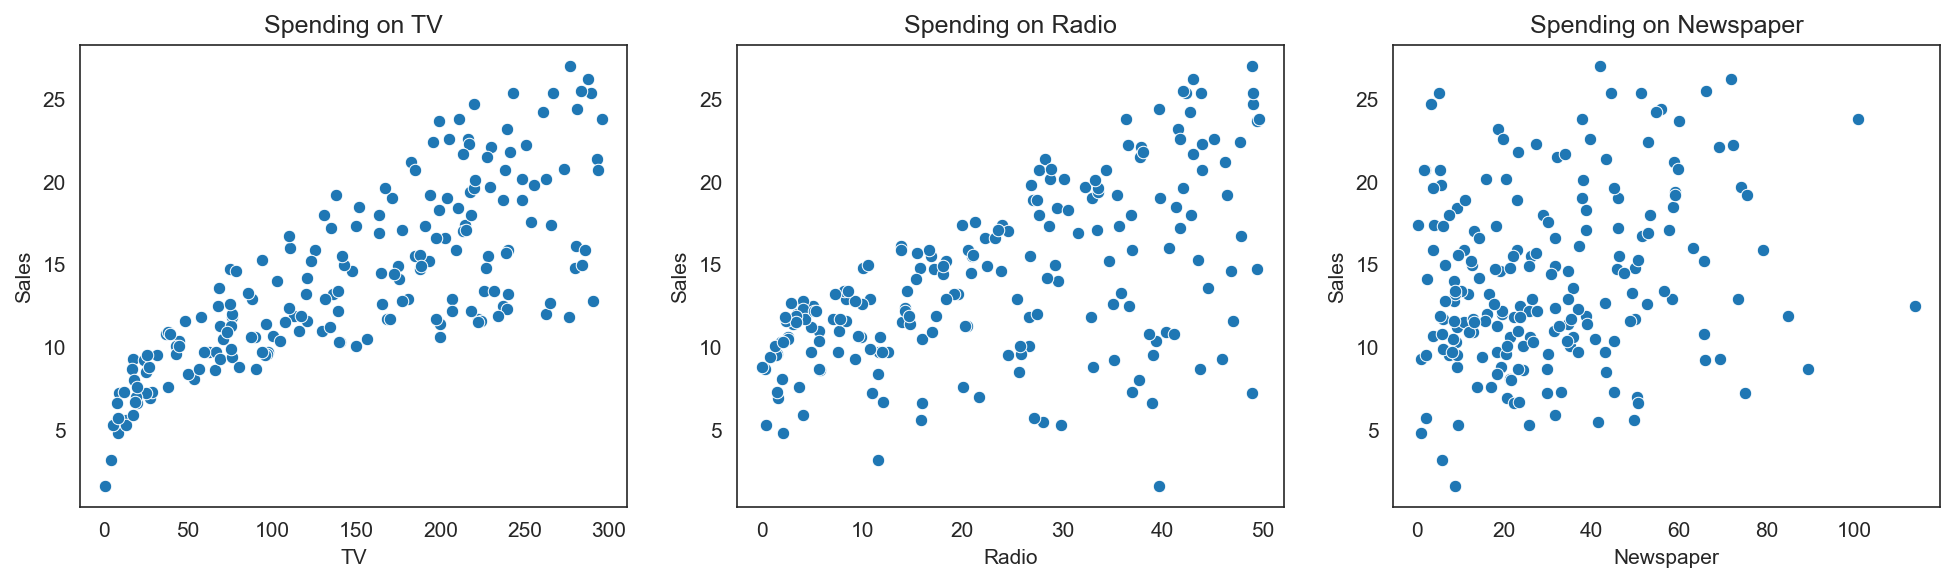

In [31]:
number_features = df.shape[1]-1

fig, ax = plt.subplots(1, number_features, figsize = (16,4), dpi = 150)

for i, feature in enumerate(df.columns[:-1]):
    sns.scatterplot(data = df, x = feature, y="Sales", ax=ax[i])
    ax[i].set_title(f"Spending on {feature}")

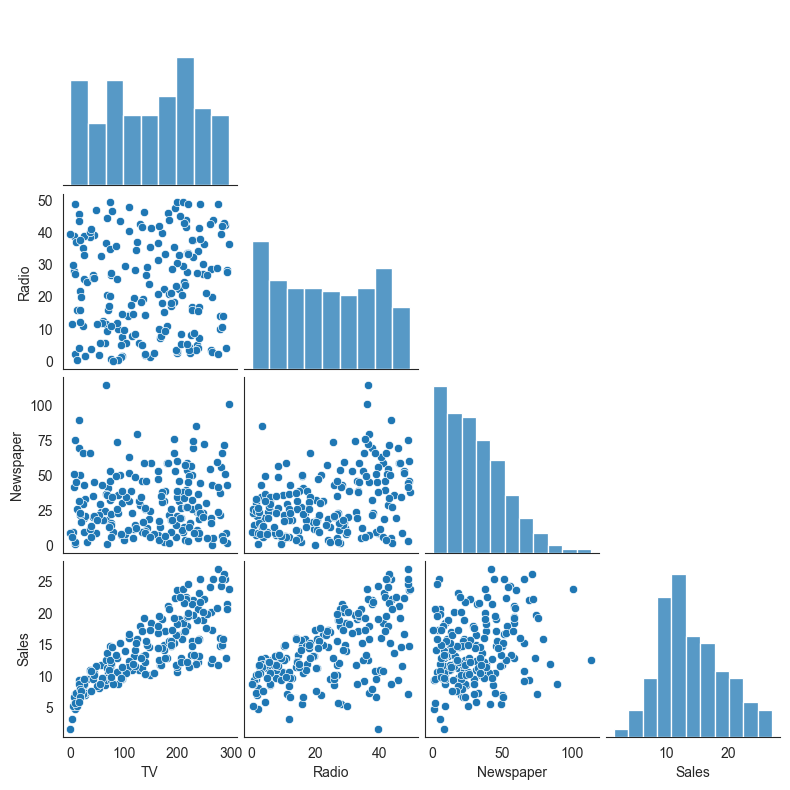

In [35]:
ax = sns.pairplot(df, corner=True, height=2)

In [43]:
X, y = df["TV"], df["Sales"]
beta_1, beta_0 = np.polyfit(X, y, deg=1)

y_hat = lambda x: beta_0 + beta_1*x

print(f"Intercept beta_0 hat: {beta_0:.4f}")
print(f"Slope beta_1 hat: {beta_1:.4f}")

spend = np.linspace(0, 350)

fig, ax = plt.figure(figsize=(5, 3), dpi=100)


ax = sns.scatterplot(data = df, x = "TV", y = "Sales")
sns.lineplot(x = spend, y=y_hat(spend), color = "red")
ax.set(title=("TV advertisement linear reg"), xlabel="")







Intercept beta_0 hat: 7.0326
Slope beta_1 hat: 0.0475


TypeError: cannot unpack non-iterable Figure object

<Figure size 500x300 with 0 Axes>

[Text(0.5, 1.0, 'Regression line on TV advertisement and sales')]

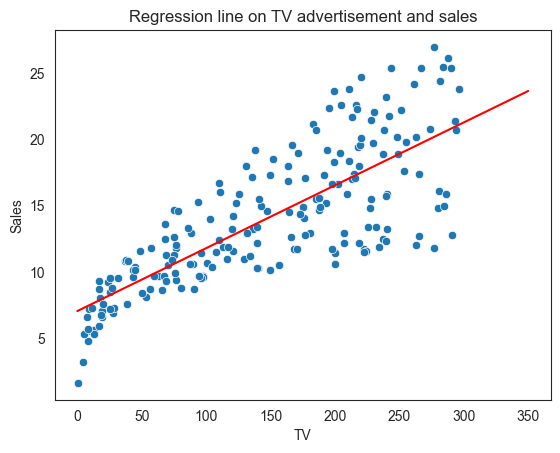

In [44]:
y_hat = lambda x: beta_0 + beta_1*x

spending = np.linspace(0, 350)

ax = sns.scatterplot(data = df, x = "TV", y = "Sales")
sns.lineplot(x = spending, y=y_hat(spending), color = "red")
ax.set(title = "Regression line on TV advertisement and sales")

In [49]:
X, y = df.drop("Sales", axis="columns"), df["Sales"]
X.insert(0, "Intercept", 1)

regression_fit = lambda X, y: np.linalg.pinv(X.T @ X) @ X.T @ y
beta_hat = regression_fit(X, y)

predict = lambda x, beta: np.dot(x, beta)

test_sample = [1, 230.1, 37.8, 69.2]

y_hat = predict(test_sample, beta_hat)

print(f"TV: $230.1k, Radio: $37.8k, Newspaper: $69.2k predicts {y_hat:.1f} thousand units.")

TV: $230.1k, Radio: $37.8k, Newspaper: $69.2k predicts 20.5 thousand units.


In [50]:
train_fraction = int(len(df)*0.7)

train = df.sample(n=train_fraction, random_state=42, replace=False)
test = df.drop(train.index)

X_train, y_train = (train.drop("Sales", axis="columns")), train["Sales"]
X_test, y_test = test.drop("Sales", axis="columns"), test["Sales"]


X_train.insert(0, "Intercept", 1)
X_test.insert(0, "Intercept", 1)

for dataset in ["X_train", "X_test", "y_train", "y_test"]:
    print(f"Shape of {dataset}: {eval(dataset).shape}")

Shape of X_train: (140, 4)
Shape of X_test: (60, 4)
Shape of y_train: (140,)
Shape of y_test: (60,)


In [51]:
beta_hat = regression_fit(X_train, y_train)
print(f"Regression coefficients beta: {beta_hat.values}")

predict = lambda X, weights: X @ weights

y_hat = predict(X_test.to_numpy(), np.reshape(beta_hat.to_numpy(), (4, 1)))

print(f"Shape of y_hat is {y_hat.shape}, i.e prediction ")
print(f"")

Regression coefficients beta: [ 2.95609427  0.04679253  0.18706314 -0.00480492]


In [52]:
m = len(y_test)
y_hat = np.reshape(y_hat, (m))

MAE = np.divide(1, m) * np.sum(np.abs(y_test - y_hat))
MSE = np.divide(1, m) * np.sum(np.square(y_test - y_hat))
RMSE = np.sqrt(MSE)

for metric in [
    ("Mean absolute error", "MAE", "k units"),
    ("Mean sqared error", "MSE", "M units"),
    ("Root mean squared error", "RMSE", "k units")
]:
    print(f"{metric[0]}: {eval(metric[1]):.2f}{metric[2]}")

ValueError: cannot reshape array of size 1 into shape (60,)